# Summarising geometry

With a data cube containing variable geometry, you can use `xvec` to generate a summary geometry that can be used as an additional `GeometryIndex`.

In [ ]:
import geopandas as gpd
import xproj

import xvec

Use the example dataset of Svalbard glaciers over time.

In [36]:
glaciers_df = gpd.read_file("https://github.com/loreabad6/post/raw/refs/heads/main/inst/extdata/svalbard.gpkg")
glaciers = (
    glaciers_df.set_index(["name", "year"])
    .to_xarray()
    .proj.assign_crs(spatial_ref=glaciers_df.crs)  # use xproj to store the CRS information
)
glaciers

<xarray.Dataset> Size: 432B
Dimensions:      (name: 5, year: 3)
Coordinates:
  * name         (name) object 40B 'Austre Brøggerbreen' ... 'Steenbreen'
  * year         (year) float64 24B 1.936e+03 1.99e+03 2.007e+03
  * spatial_ref  int64 8B 0
Data variables:
    length       (name, year) float64 120B 5.808e+03 5.265e+03 ... 1.819e+03
    fwidth       (name, year) float64 120B 1.254e+03 470.1 888.4 ... 279.4 202.6
    geometry     (name, year) object 120B POLYGON ((432375.11039999966 876165...
Indexes:
    spatial_ref  CRSIndex (crs=EPSG:32633)

Visualised, the changing variable geometry looks like this:

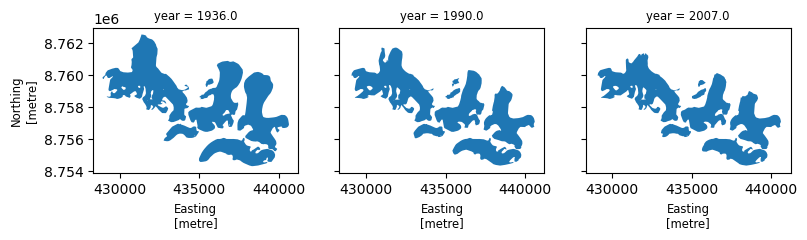

In [42]:
f, axs = glaciers.xvec.plot(col='year', geometry='geometry')

Generate summary geometry along 'name' dimension.

In [44]:
glaciers = glaciers.xvec.summarize_geometry(
    dim="name", geom_array="geometry"
)
glaciers

<xarray.Dataset> Size: 472B
Dimensions:           (name: 5, year: 3)
Coordinates:
  * name              (name) object 40B 'Austre Brøggerbreen' ... 'Steenbreen'
  * year              (year) float64 24B 1.936e+03 1.99e+03 2.007e+03
  * spatial_ref       int64 8B 0
  * summary_geometry  (name) object 40B POLYGON ((428910.11039999966 8757044....
Data variables:
    length            (name, year) float64 120B 5.808e+03 ... 1.819e+03
    fwidth            (name, year) float64 120B 1.254e+03 470.1 ... 279.4 202.6
    geometry          (name, year) object 120B POLYGON ((432375.11039999966 8...
Indexes:
    spatial_ref       CRSIndex (crs=EPSG:32633)
    summary_geometry  GeometryIndex (crs=EPSG:32633)

This has added new coordinates backed by the GeometryIndex to the dimension `name`. It optionally tries to retrieve CRS of the variable geometry using `xproj`.

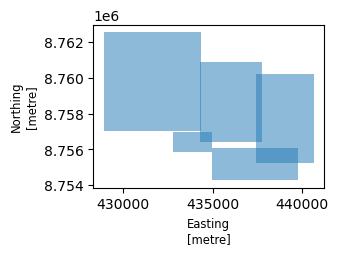

In [47]:
f, ax = glaciers.xvec.plot(geometry="summary_geometry", alpha=.5)

The default summary is using the total envelope (bounding box) of all geometries at the same coordinate of the set dimension. However, you can do any of the:

- `"envelope"` - envelope (bounding box) of combined geometries
- `"oriented_envelope"` - oriented envelope (minimum rotated recatngle) of combined geometries
- `"centroid"`- centroid of combined geometries (derived from a GeometryCollection combining all)
- `"convex_hull"` - convex hull of combined geometries
- `"concave_hull"` - concave hull of combined geometries
- `"collection"` - collection combining all geometries
- `"union"` - union of all geometries

or a callable.

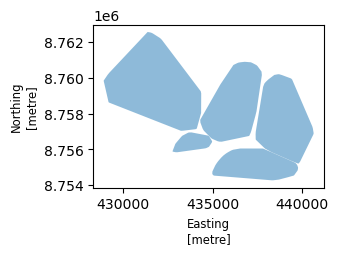

In [49]:
glaciers = glaciers.xvec.summarize_geometry(
    dim="name", geom_array="geometry", aggfunc='convex_hull'
)
f, ax = glaciers.xvec.plot(geometry="summary_geometry", alpha=.5)

You can also pass additional args to the aggregation function.

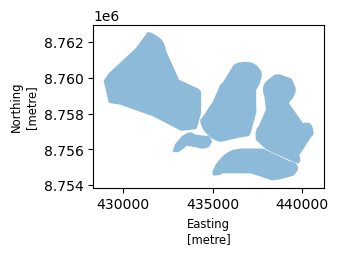

In [52]:
glaciers = glaciers.xvec.summarize_geometry(
    dim="name", geom_array="geometry", aggfunc='concave_hull', ratio=.5
)
f, ax = glaciers.xvec.plot(geometry="summary_geometry", alpha=.5)